## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
mouse_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_merge.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Checking the number of mice.
number_of_unimouse = mouse_merge["Mouse ID"].nunique()
number_of_mouse =mouse_merge["Mouse ID"].count()

print(number_of_unimouse)
print(number_of_mouse)

249
1893


In [6]:
mouse_merge.shape

(1893, 8)

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_duplicate = mouse_merge[mouse_merge.duplicated(['Mouse ID', 'Timepoint'])] 
mouse_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID

mouse_IDduplicate = mouse_merge[mouse_merge['Mouse ID']== 'g989']
mouse_IDduplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
mouse_IDduplicate.count()

Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by Mouse ID

mouse_study = mouse_merge[mouse_merge['Mouse ID']!='g989']
mouse_study.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [11]:
# Checking the number of mice in the clean DataFrame.
study_mouseunique = mouse_study["Mouse ID"].nunique()
study_mousenumber = mouse_study["Mouse ID"].count()

print(study_mouseunique)
print(study_mousenumber)

248
1880


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume= mouse_study.groupby('Drug Regimen')
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = tumor_volume['Tumor Volume (mm3)'].mean()
tumor_median = tumor_volume['Tumor Volume (mm3)'].median()
tumor_variance = tumor_volume['Tumor Volume (mm3)'].var()
tumor_stdv = tumor_volume['Tumor Volume (mm3)'].std()
tumor_SEM = tumor_volume['Tumor Volume (mm3)'].sem()

tumor_data = pd.DataFrame({"Mean":tumor_mean,"Median":tumor_median, "Variance":
                             tumor_variance, "STDV": tumor_stdv,"SEM": tumor_SEM})


tumor_data["Mean"] = tumor_data["Mean"].map("{:.2f}".format)
tumor_data["Median"] = tumor_data["Median"].map("{:.2f}".format)
tumor_data["Variance"] = tumor_data["Variance"].map("{:.2f}".format)
tumor_data["STDV"] = tumor_data["STDV"].map("{:.2f}".format)
tumor_data["SEM"] = tumor_data["SEM"].map("{:.2f}".format)



tumor_data

,Mean,Median,Variance,STDV,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
result = mouse_study.groupby(['Drug Regimen']).agg(
                      {'Tumor Volume (mm3)':['mean','median', 'var','std','sem']})
result

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_regimen = mouse_study[['Mouse ID','Drug Regimen']]
mice_regimen.head()


,Mouse ID,Drug Regimen
0,k403,Ramicane
1,k403,Ramicane
2,k403,Ramicane
3,k403,Ramicane
4,k403,Ramicane


Text(0, 0.5, 'Number of Mice')

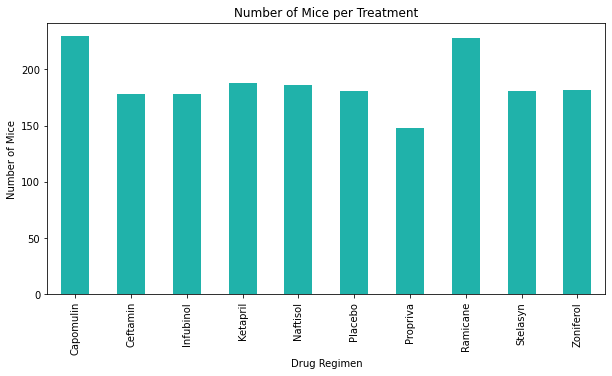

In [15]:
mice_regimengroup = mice_regimen.groupby("Drug Regimen")
mouse_count = mice_regimengroup['Mouse ID'].count()

mouse_count_bar = mouse_count.plot(kind='bar', figsize=(10,5), facecolor ='lightseagreen', title='Number of Mice per Treatment')
mouse_count_bar.set_ylabel('Number of Mice')

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

pyplot_mice = pd.DataFrame({"Number of Mice per Regimen":mouse_count})
pyplot_mice.reset_index(inplace = True) 
pyplot_mice

,Drug Regimen,Number of Mice per Regimen
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


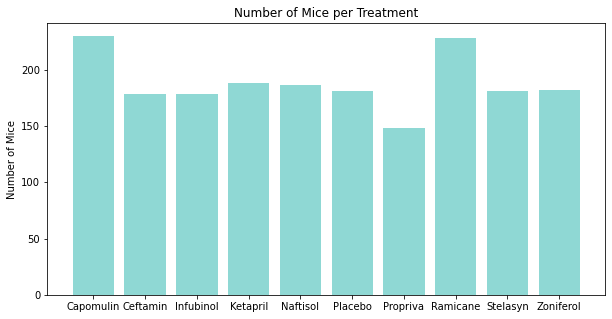

In [17]:
x_axis = np.arange(len(pyplot_mice))
plt.figure(figsize=(10,5))
plt.bar(x_axis, pyplot_mice["Number of Mice per Regimen"], color='lightseagreen', alpha=0.5)
plt.title("Number of Mice per Treatment")
plt.ylabel("Number of Mice")
drug = plt.xticks(x_axis, pyplot_mice["Drug Regimen"])


In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex= mouse_study[['Mouse ID','Sex']]
mice_sex.head()


,Mouse ID,Sex
0,k403,Male
1,k403,Male
2,k403,Male
3,k403,Male
4,k403,Male


In [19]:
sex_group = mice_sex.groupby("Sex")
mouseunique = sex_group["Mouse ID"].nunique()
mice_dist = mouseunique/study_mouseunique *100
mice_dist

Sex
Female    49.596774
Male      50.403226
Name: Mouse ID, dtype: float64

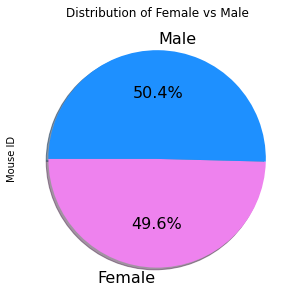

In [20]:
plt.figure(figsize=(10,5))
color=["violet","dodgerblue" ]
sex_pdPie = mice_dist.plot(kind="pie", autopct='%1.1f%%', colors=color, fontsize= 16, startangle=180, shadow=True, title=("Distribution of Female vs Male"))
plt.show()

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pyplot_sex = pd.DataFrame({"Distribution":mice_dist})
pyplot_sex.reset_index(inplace = True) 
pyplot_sex

,Sex,Distribution
0,Female,49.596774
1,Male,50.403226


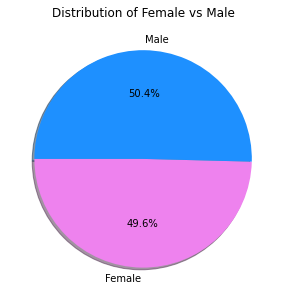

In [22]:
plt.figure(figsize=(10,5))
color=["violet","dodgerblue" ]

plt.pie(pyplot_sex['Distribution'],labels=pyplot_sex['Sex'],colors=color, autopct='%1.1f%%', startangle=180, shadow=True)
plt.title('Distribution of Female vs Male')

plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
#filtering the DataFrame to get just Capomulin, Ramicane, Infurbinol, Ceftamin
drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
new_mouse_study = mouse_study[mouse_study["Drug Regimen"].isin(drug)] 
new_mouse_study.head(20
                    )

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Last_group = new_mouse_study.groupby(['Mouse ID','Drug Regimen'])
#Mouse_tested = Last_group['Mouse ID'].nunique()
Last_time = Last_group['Timepoint'].max()
#Last_time = Last_group[Last_group['Mouse ID']== '45']
# Start by getting the last (greatest) timepoint for each mouse

Last_timepoint = pd.DataFrame({"Final Timepoint":Last_time})
Last_timepoint.head(10)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,,Final Timepoint
Mouse ID,Drug Regimen,
a203,Infubinol,45
a251,Infubinol,45
a275,Ceftamin,45
a411,Ramicane,45
a444,Ramicane,45
a520,Ramicane,45
a577,Infubinol,30
a644,Ramicane,45
a685,Infubinol,45


In [26]:
New_drug_frame= pd.merge(Last_timepoint, new_mouse_study, on="Mouse ID", how="outer")
Last_tumor_measurement = New_drug_frame.drop_duplicates(subset=['Mouse ID', 'Final Timepoint'], keep='last')
Last_tumor_measurement .head(50)




,Mouse ID,Final Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a275,45,Ceftamin,Female,20,28,45,62.999356,3
39,a411,45,Ramicane,Male,3,22,45,38.407618,1
49,a444,45,Ramicane,Female,10,25,45,43.047543,0
59,a520,45,Ramicane,Male,13,21,45,38.810366,1
66,a577,30,Infubinol,Female,6,25,30,57.031862,2
76,a644,45,Ramicane,Female,7,17,45,32.978522,1
86,a685,45,Infubinol,Male,8,30,45,66.083066,3
96,b128,45,Capomulin,Female,9,22,45,38.982878,2


In [27]:

#drug_camul = new_mouse_study[new_mouse_study["Drug Regimen"].isin(["Ceftamin"])]
#drug_camul


#drug = Last_tumor_measurement.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
#cap_vol = Last_tumor_volume["Capomulin"]

#quantiles = cap_vol.quantile([0.25,0.5,0.75])
#lowerq = quantiles[0.25]
#upperq = quantiles[0.75]
#iqr = upperq - lowerq

#lower_bound = lowerq - (1.5*iqr)
#upper_bound = upperq + (1.5*iqr)

#outliers = cap_vol.loc[(cap_vol < lower_bound) | (cap_vol > upper_bound)]
#quantiles


In [28]:
# Put treatments into a list for for loop (and later for plot labels)

#treatments = Last_tumor_measurement['Drug Regimen'].to_list()
treatments = Last_tumor_measurement['Drug Regimen'].unique()
tumor_volume_data ={} 
#volume_data = pd.DataFrame(columns = ["Treatment", "Q1", "Q3", "IQR","Lower bound", "Upper bound", "Outliers" ])
# Create empty list to fill with tumor vol data (for plotting)
for drug in treatments:
    
    tumor_volume_data[drug]= None
    regimen= Last_tumor_measurement[Last_tumor_measurement['Drug Regimen'] == drug]
  
    tumor= regimen['Tumor Volume (mm3)']
  
    quartiles = tumor.quantile([.25,.5,.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
   # Calculate the IQR and quantitatively determine if there are any potential outliers.
    IQR = Q3 - Q1
    #quartiles
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)
    for volume in tumor:
       
        if  (volume < lower_bound) | (volume > upper_bound):
          
            tumor_volume_data[drug] = volume
 
#tumor_volume_data
# Determine outliers using upper and lower bounds
tumor_volume_data

{'Infubinol': 36.321345799999996,
 'Ceftamin': None,
 'Ramicane': None,
 'Capomulin': None}

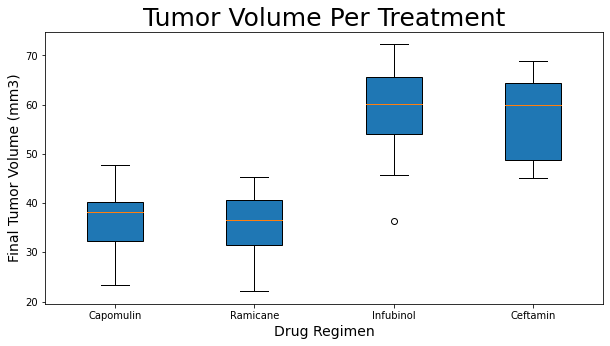

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

capomulin =  Last_tumor_measurement[Last_tumor_measurement['Drug Regimen']== 'Capomulin']
capo_tumor = capomulin['Tumor Volume (mm3)']


ramicane =  Last_tumor_measurement[Last_tumor_measurement['Drug Regimen']== 'Ramicane']
rami_tumor = ramicane['Tumor Volume (mm3)']

infubinol=  Last_tumor_measurement[Last_tumor_measurement['Drug Regimen']== 'Infubinol']
infu_tumor = infubinol['Tumor Volume (mm3)']

ceftamin=  Last_tumor_measurement[Last_tumor_measurement['Drug Regimen']== 'Ceftamin']
cef_tumor = ceftamin['Tumor Volume (mm3)']

plotting= [capo_tumor, rami_tumor, infu_tumor, cef_tumor]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

plt.subplots(figsize=(10,5))
plt.title('Tumor Volume Per Treatment',fontsize =25)
plt.ylabel('Final Tumor Volume (mm3)',fontsize = 14)
plt.xlabel('Drug Regimen',fontsize = 14)
plt.boxplot(plotting, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)




plt.show()



## Line and Scatter Plots

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulinLS =  mouse_study[mouse_study['Drug Regimen']== 'Capomulin']
capomulinLS.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


Text(0, 0.5, 'Tumor Volume (mm3)')

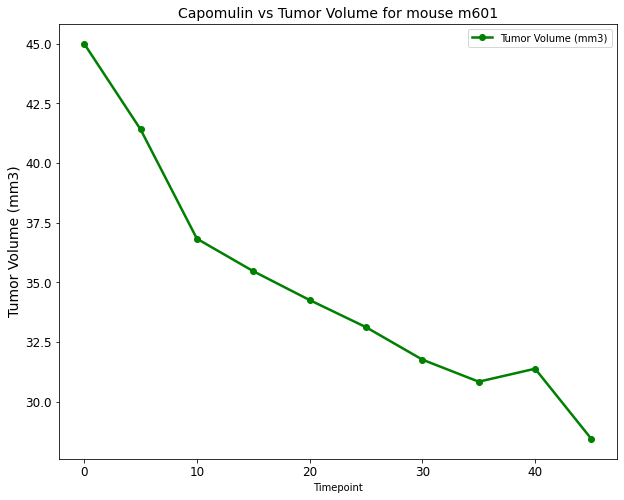

In [40]:
Mouse = "m601"

mouse_capomulin = capomulinLS.loc[capomulinLS['Mouse ID'] == Mouse]
#mouse_capomulin
mouse_linechart = mouse_capomulin.loc[:, ['Timepoint', 'Tumor Volume (mm3)']]
mouse_linechart.set_index("Timepoint").plot(figsize=(10,8), linewidth=2.5, marker='o', color="green", fontsize=12)

plt.title("Capomulin vs Tumor Volume for mouse m601", fontsize=14)
plt.ylabel("Tumor Volume (mm3)", fontsize=14)


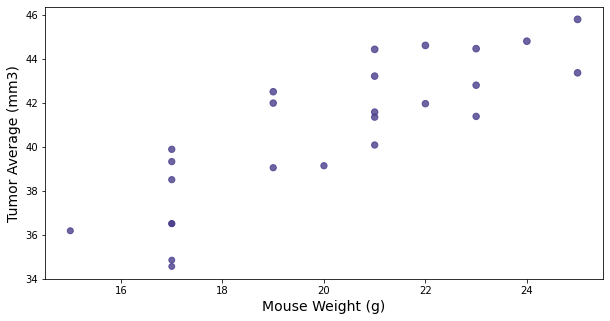

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

tumor_scat = capomulinLS[['Mouse ID','Weight (g)', 'Tumor Volume (mm3)']]

tumor_scat_group = tumor_scat.groupby(['Mouse ID','Weight (g)'])
average = tumor_scat_group['Tumor Volume (mm3)'].mean()
tumor_averagedf = pd.DataFrame({"Tumor Average":average}).reset_index()

x_values = tumor_averagedf['Weight (g)']
y_values = tumor_averagedf['Tumor Average']
plt.figure(figsize=(10,5))
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)
plt.xlabel('Mouse Weight (g)', fontsize=14)
plt.ylabel('Tumor Average (mm3)', fontsize=14)
plt.show()



## Correlation and Regression

In [45]:
tumor_averagedf.head()

,Mouse ID,Weight (g),Tumor Average
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [54]:
# Calculate the correlation coefficient and linear regression model 

weightP = tumor_averagedf['Weight (g)']
tumorP = tumor_averagedf['Tumor Average']
correlation = st.pearsonr(weightP, tumorP)

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

x_values = tumor_averagedf['Weight (g)']
y_values = tumor_averagedf['Tumor Average']

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



The correlation coefficient (r) is 0.84
The p-value is 1.322572243471279e-07


Text(0, 0.5, 'Tumor Average (mm3)')

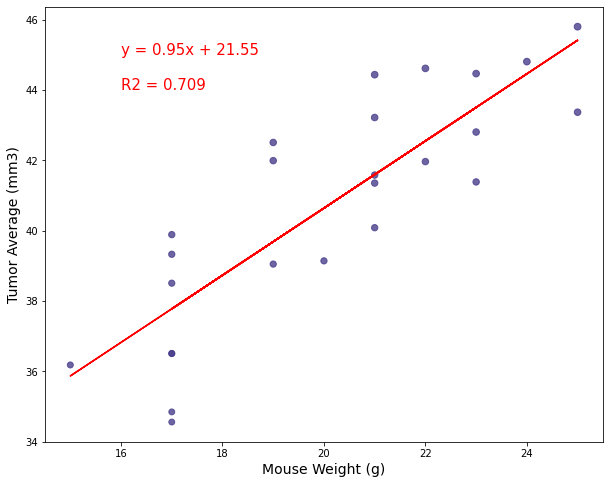

In [89]:
plt.figure(figsize=(10,8))
# Plot observations
plt.scatter(x_values, y_values, facecolors="darkslateblue", alpha=0.8, s=y_values)

# Plot the regression line
plt.plot(x_values, regression, "red")
plt.annotate(line_eq, (16, 45), fontsize=15, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (16,44), fontsize=15, color="red")


plt.xlabel('Mouse Weight (g)', fontsize=14)
plt.ylabel('Tumor Average (mm3)', fontsize=14)

